In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

import os

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

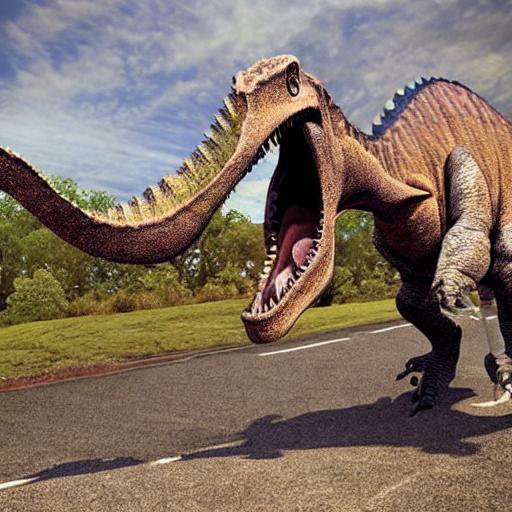

In [2]:
path = '/kaggle/input/dino-or-dragon/train/dino'
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

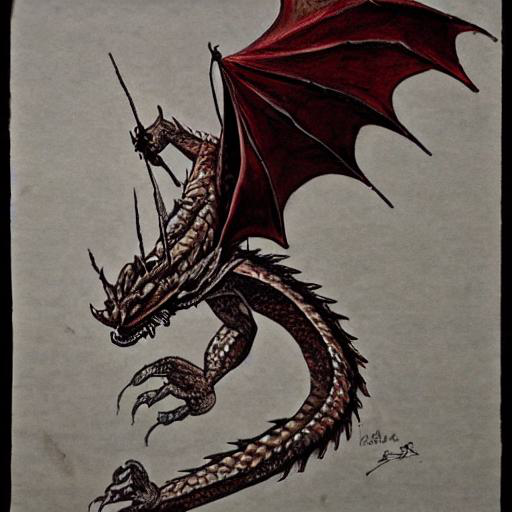

In [3]:
path = '/kaggle/input/dino-or-dragon/train/dragon'
name = '000bf8e2-6467-462f-b4c8-61c78f94241b.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

We will use CNN and we will build our model from scratch using keras.

# Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:
- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
    - Use 32 filters
    - Kernel size should be (3, 3) (that's the size of the filter)
    - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
    - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)

In [4]:
def make_model(input_shape=(150,150,3)):  
    ####################################################################### CREATE ARCHITECTURE
    model = keras.Sequential(name='dindra_v1')
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    ####################################################################### END OF ARCHITIECTURE
    
    optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

# Question 1
Since we have a binary classification problem, what is the best loss function for us?

- binary crossentropy
- focal loss
- mean squared error
- categorical crossentropy

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

Answers:
- binary crossentropy --> is for binary classification
- focal loss --> is for classification but the dataset is extremely imbalanced (positive class is rare)
- mean squared error --> is for regression
- categorical crossentropy --> is for multi-classification
    
So the best one for our problem is binary cross entropy

# Question 2
What's the total number of parameters of the model? You can use the summary method for that.

- 9215873
- 11215873
- 14215873
- 19215873

In [23]:
model = make_model()
model.summary()

Model: "dindra_v1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                11214912  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
# Answer is 11,215,873

# Generators and Training
For the next two questions, use the following data generator for both train and test sets:

ImageDataGenerator(rescale=1./255)

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20
- Use shuffle=True for both training and test sets.

For training use .fit() with the following params:

model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

In [7]:
image_size = (150, 150)
batch_size = 20

In [24]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    "/kaggle/input/dino-or-dragon/test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    "/kaggle/input/dino-or-dragon/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 394 images belonging to 2 classes.
Found 1594 images belonging to 2 classes.


# Question 3
What is the median of training accuracy for all the epochs for this model?
- 0.40
- 0.60
- 0.90
- 0.20

In [25]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 12s 147ms/step - loss: 0.6558 - accuracy: 0.6136 - val_loss: 0.5646 - val_accuracy: 0.8249
Epoch 2/10
80/80 [==============================] - 12s 151ms/step - loss: 0.5321 - accuracy: 0.7516 - val_loss: 0.5529 - val_accuracy: 0.6751
Epoch 3/10
80/80 [==============================] - 11s 143ms/step - loss: 0.4193 - accuracy: 0.8325 - val_loss: 0.4056 - val_accuracy: 0.8274
Epoch 4/10
80/80 [==============================] - 12s 149ms/step - loss: 0.3511 - accuracy: 0.8632 - val_loss: 0.5071 - val_accuracy: 0.7538
Epoch 5/10
80/80 [==============================] - 11s 143ms/step - loss: 0.3275 - accuracy: 0.8739 - val_loss: 0.3264 - val_accuracy: 0.8579
Epoch 6/10
80/80 [==============================] - 12s 149ms/step - loss: 0.2929 - accuracy: 0.8902 - val_loss: 0.3446 - val_accuracy: 0.8426
Epoch 7/10
80/80 [==============================] - 12s 146ms/step - loss: 0.2614 - accuracy: 0.9072 - val_loss: 0.3876 - val_accuracy: 0.8274

In [28]:
np.median(history.history['accuracy'])

0.8820577263832092

In [29]:
# Answer is 0.90

# Question 4
What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [30]:
np.std(history.history['loss'])

0.14732099477222432

In [31]:
# Answer is 0.11

# Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

# Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [32]:
train_gen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    "/kaggle/input/dino-or-dragon/train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.


In [33]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
80/80 [==============================] - 20s 248ms/step - loss: 0.4538 - accuracy: 0.7886 - val_loss: 0.4276 - val_accuracy: 0.7919
Epoch 2/10
80/80 [==============================] - 20s 244ms/step - loss: 0.4002 - accuracy: 0.8130 - val_loss: 0.2869 - val_accuracy: 0.8807
Epoch 3/10
80/80 [==============================] - 19s 234ms/step - loss: 0.3923 - accuracy: 0.8281 - val_loss: 0.2554 - val_accuracy: 0.8959
Epoch 4/10
80/80 [==============================] - 20s 244ms/step - loss: 0.3714 - accuracy: 0.8375 - val_loss: 0.5407 - val_accuracy: 0.7665
Epoch 5/10
80/80 [==============================] - 19s 238ms/step - loss: 0.3637 - accuracy: 0.8519 - val_loss: 0.4080 - val_accuracy: 0.8249
Epoch 6/10
80/80 [==============================] - 20s 244ms/step - loss: 0.3747 - accuracy: 0.8363 - val_loss: 0.7255 - val_accuracy: 0.7157
Epoch 7/10
80/80 [==============================] - 19s 240ms/step - loss: 0.3678 - accuracy: 0.8243 - val_loss: 0.3934 - val_accuracy: 0.8274

In [34]:
np.mean(history.history['val_loss'])

0.4062044024467468

In [ ]:
# Answer is 0.37

# Question 6
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [35]:
np.mean(history.history['val_accuracy'][5:])

0.8263959407806396

In [36]:
# Anwswer is 0.84